In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun
import matplotlib.axes

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-06-27 02:17:34,982 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-27 02:17:34,984 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-06-27 02:17:34,985 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-06-27 02:17:34,985 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-06-27 02:17:34,986 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z, num):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_'+str(num)+'.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [9]:
def spec(ray_, lmin, lmax, dlam=0.001, line=None, 
             el=None, rom_num=None, lrest=None, gamma=None, f_value=None, DIY=False):
    
    # Make array of rays
    k = (3.086E+21)*10 # Code length
    cu = 1/256
    
    arrays = []
    
    for i in range(len(ray_)):
        ray = ray_[i]

        sg = trident.SpectrumGenerator(lambda_min= lmin, lambda_max= lmax, dlambda=dlam)

        if DIY==True:

            DIY_line = el+' '+str(rom_num)+' '+str(int(lrest))
            sg.add_line_to_database(el, rom_num, lrest, gamma,f_value, field=None,
                                    identifier=DIY_line)

            sg.make_spectrum(ray, lines=[DIY_line])
            sg.save_spectrum('spec.txt')

        else:
            sg.make_spectrum(ray, lines=[line])
            sg.save_spectrum('spec.txt')
            
        f = np.loadtxt('spec.txt')
        lam = f[:,0] # All rows, 1st column
        flux = f[:,2]

        tog = np.array([lam, flux])
        arrays.append(tog)
        

        
  
    
    # Average Flux
#     flux_list = []

    
#     flux_ = arrays[1]
#     flux_list.append(flux_) # Append flux to a list
#     flux_arr = np.array(flux_list) # Turn list into an array
#     flux_a = flux_arr.T # Transpose array
        

        
#     reds = get_cmap('cet_CET_L18')
#     colors = reds(np.linspace(0.25,1,6))
    color_= ['deeppink', 'orangered', 'teal', 'mediumblue', 'black', 'olivedrab', 'crimson']
    fig = plt.figure(figsize=(15, 5))
    
    for j in range(len(ray_)):
        plt.plot(arrays[0][0], arrays[j][1], color=color_[j], label='Ray '+str(j+1), alpha=0.6)
    plt.xlim(lmin, lmax)
    if DIY==False:
        plt.title(line+" '140.h5.0' (d$\lambda$ = " + str(dlam)+")", fontsize=14)
    else:
        plt.title(el+" "+rom_num+" "+str(int(lrest))+" '140.h5.0' (d$\lambda$ = " + str(dlam)+")", fontsize=14)
    plt.xlabel('Wavelength [$\AA$]', fontsize=12)
    plt.ylabel('Relative Flux', fontsize=12)
    plt.legend(fontsize=12)

    return arrays

In [5]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5, 1)
ray2 = make_ray(1.2524, 0.33, 0, 1.2524, 0.48, 1, 2)
ray3 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, 3)
ray4 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, 4)
ray5 = make_ray(0,0.11,0, 2, 0.96, 0.8,5)
ray6 = make_ray(2,0.4,0.482, 0, 0.4, 0.482, 6)
ray7 = make_ray(0,0.4,0.482, 2, 0.4, 0.482, 7)

yt : [INFO     ] 2022-06-27 02:18:46,658 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-06-27 02:18:46,661 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-06-27 02:18:47,311 Saving field data to yt dataset: ray_1.h5.
yt : [INFO     ] 2022-06-27 02:18:47,394 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-06-27 02:18:47,395 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-06-27 02:18:47,395 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-06-27 02:18:47,395 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 202

In [6]:
rays = [ray1,ray2,ray3,ray4,ray5,ray6,ray7]

# Ly a

yt : [INFO     ] 2022-06-27 02:20:58,883 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:20:58,895 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 256/256 [00:01<00:00, 143.27it/s] 
yt : [INFO     ] 2022-06-27 02:21:00,728 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-27 02:21:00,729 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:00,903 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:00,907 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|██████████| 294/294 [00:00<00:00, 2247.09it/s]
yt : [INFO     ] 2022-06-27 02:21:01,072 Not adding continuum Ly C: insufficient column density or out of range
yt : [INFO     ] 2022-06-27 02:21:01,072 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:01,245 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:01,248 Creating spectrum
Adding line - Ly a [1215.670000 A]: : 100%|

[array([[1.209000e+03, 1.209001e+03, 1.209002e+03, ..., 1.224998e+03,
         1.224999e+03, 1.225000e+03],
        [9.909983e-01, 9.909956e-01, 9.909929e-01, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.209000e+03, 1.209001e+03, 1.209002e+03, ..., 1.224998e+03,
         1.224999e+03, 1.225000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.209000e+03, 1.209001e+03, 1.209002e+03, ..., 1.224998e+03,
         1.224999e+03, 1.225000e+03],
        [9.964224e-01, 9.964213e-01, 9.964202e-01, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.209000e+03, 1.209001e+03, 1.209002e+03, ..., 1.224998e+03,
         1.224999e+03, 1.225000e+03],
        [9.989357e-01, 9.989353e-01, 9.989350e-01, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.209000e+03, 1.209001e+03, 1.209002e+03, ..., 1.224998e+03,
         1.224999e+03, 1.225000e+03],
        [1.000000e+0

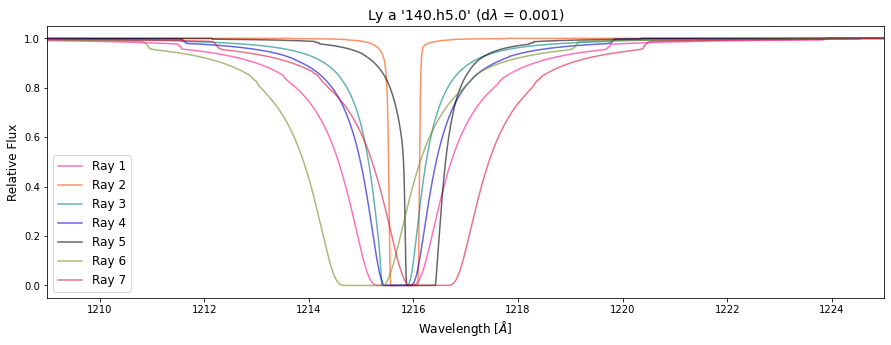

In [10]:
spec(ray_=rays, lmin=1209, lmax=1225, line='Ly a')

# Si

## Si II 1526

yt : [INFO     ] 2022-06-27 02:21:09,524 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:09,527 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:09,569 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2843.31it/s]
yt : [INFO     ] 2022-06-27 02:21:09,691 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:09,735 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:09,738 Creating Si_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:09,741 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 294/294 [00:00<00:00, 13244.32it/s]
yt : [INFO     ] 2022-06-27 02:21:09,795 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:09,887 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:09,890 Creating Si_p1_number_density from ray

[array([[1.525000e+03, 1.525001e+03, 1.525002e+03, ..., 1.528998e+03,
         1.528999e+03, 1.529000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.525000e+03, 1.525001e+03, 1.525002e+03, ..., 1.528998e+03,
         1.528999e+03, 1.529000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.525000e+03, 1.525001e+03, 1.525002e+03, ..., 1.528998e+03,
         1.528999e+03, 1.529000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.525000e+03, 1.525001e+03, 1.525002e+03, ..., 1.528998e+03,
         1.528999e+03, 1.529000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.525000e+03, 1.525001e+03, 1.525002e+03, ..., 1.528998e+03,
         1.528999e+03, 1.529000e+03],
        [1.000000e+0

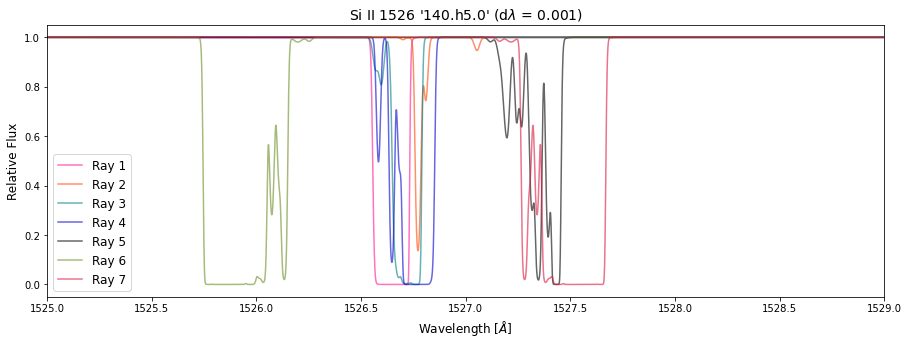

In [11]:
spec(rays, 1525, 1529, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True)

yt : [INFO     ] 2022-06-27 02:21:10,935 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:10,939 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2796.34it/s]
yt : [INFO     ] 2022-06-27 02:21:11,063 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:11,087 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:11,092 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 294/294 [00:00<00:00, 12872.28it/s]
yt : [INFO     ] 2022-06-27 02:21:11,150 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:11,174 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:11,177 Creating spectrum
Adding line - Si II 1526 [1526.707000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10431.06it/s]
yt : [INFO     ] 2022-06-27 02:21:11,234 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:11,258 Setting instrument to Custom
yt :

[array([[1.526000e+03, 1.526001e+03, 1.526002e+03, ..., 1.527998e+03,
         1.527999e+03, 1.528000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.526000e+03, 1.526001e+03, 1.526002e+03, ..., 1.527998e+03,
         1.527999e+03, 1.528000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.526000e+03, 1.526001e+03, 1.526002e+03, ..., 1.527998e+03,
         1.527999e+03, 1.528000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.526000e+03, 1.526001e+03, 1.526002e+03, ..., 1.527998e+03,
         1.527999e+03, 1.528000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.526000e+03, 1.526001e+03, 1.526002e+03, ..., 1.527998e+03,
         1.527999e+03, 1.528000e+03],
        [1.000000e+0

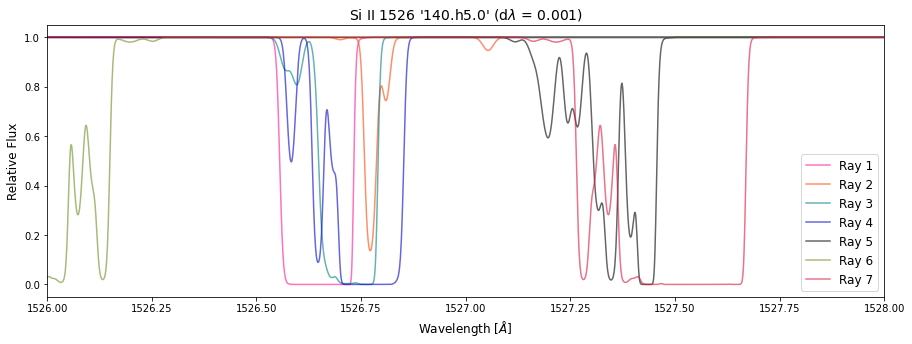

In [12]:
spec(rays, 1526, 1528, el='Si', rom_num='II', lrest=1526.7070, gamma=3.78E+08, 
     f_value=1.32E-01, DIY=True)

## Si III 1206

yt : [INFO     ] 2022-06-27 02:23:07,592 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:23:07,606 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2907.57it/s]
yt : [INFO     ] 2022-06-27 02:23:07,833 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:23:07,877 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:23:07,880 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 294/294 [00:00<00:00, 10378.10it/s]
yt : [INFO     ] 2022-06-27 02:23:07,967 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:23:08,011 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:23:08,014 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 9017.28it/s]
yt : [INFO     ] 2022-06-27 02:23:08,101 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:23:08,146 Setting instrument to Custom
yt

[array([[1.204500e+03, 1.204501e+03, 1.204502e+03, ..., 1.208498e+03,
         1.208499e+03, 1.208500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.204500e+03, 1.204501e+03, 1.204502e+03, ..., 1.208498e+03,
         1.208499e+03, 1.208500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.204500e+03, 1.204501e+03, 1.204502e+03, ..., 1.208498e+03,
         1.208499e+03, 1.208500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.204500e+03, 1.204501e+03, 1.204502e+03, ..., 1.208498e+03,
         1.208499e+03, 1.208500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.204500e+03, 1.204501e+03, 1.204502e+03, ..., 1.208498e+03,
         1.208499e+03, 1.208500e+03],
        [1.000000e+0

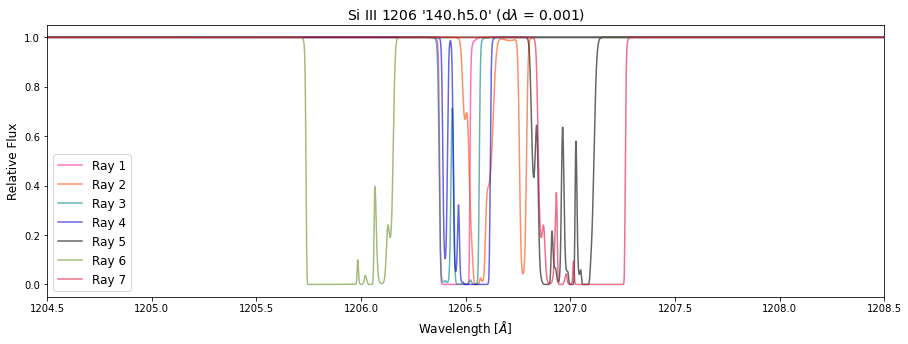

In [44]:
spec(rays, 1204.5, 1208.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, dlam=0.001)

yt : [INFO     ] 2022-06-27 02:21:13,959 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:13,963 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2873.66it/s]
yt : [INFO     ] 2022-06-27 02:21:14,168 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:14,185 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:14,188 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 294/294 [00:00<00:00, 10308.17it/s]
yt : [INFO     ] 2022-06-27 02:21:14,274 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:14,292 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:14,295 Creating spectrum
Adding line - Si III 1206 [1206.500000 A]: : 100%|██████████| 256/256 [00:00<00:00, 8867.08it/s]
yt : [INFO     ] 2022-06-27 02:21:14,385 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:14,403 Setting instrument to Custom
yt

[array([[1.206000e+03, 1.206001e+03, 1.206002e+03, ..., 1.207498e+03,
         1.207499e+03, 1.207500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.206000e+03, 1.206001e+03, 1.206002e+03, ..., 1.207498e+03,
         1.207499e+03, 1.207500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.206000e+03, 1.206001e+03, 1.206002e+03, ..., 1.207498e+03,
         1.207499e+03, 1.207500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.206000e+03, 1.206001e+03, 1.206002e+03, ..., 1.207498e+03,
         1.207499e+03, 1.207500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.206000e+03, 1.206001e+03, 1.206002e+03, ..., 1.207498e+03,
         1.207499e+03, 1.207500e+03],
        [1.000000e+0

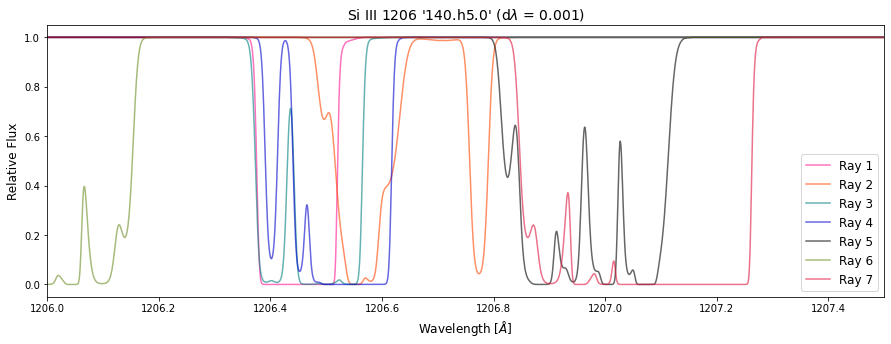

In [14]:
spec(rays, 1206, 1207.5, el='Si', rom_num='III', lrest=1206.5, gamma=2.57E+09, 
     f_value=1.68E+00 , DIY=True, dlam=0.001)

## Si IV 1393

yt : [INFO     ] 2022-06-27 02:21:15,563 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:15,566 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:15,587 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3555.06it/s]
yt : [INFO     ] 2022-06-27 02:21:15,689 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:15,734 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:15,736 Creating Si_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:15,740 Creating spectrum
Adding line - Si IV 1393 [1393.755000 A]: : 100%|██████████| 294/294 [00:00<00:00, 11357.99it/s]
yt : [INFO     ] 2022-06-27 02:21:15,797 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:15,842 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:15,845 Creating Si_p3_number_density from ray

[array([[1.392000e+03, 1.392001e+03, 1.392002e+03, ..., 1.395998e+03,
         1.395999e+03, 1.396000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.392000e+03, 1.392001e+03, 1.392002e+03, ..., 1.395998e+03,
         1.395999e+03, 1.396000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.392000e+03, 1.392001e+03, 1.392002e+03, ..., 1.395998e+03,
         1.395999e+03, 1.396000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.392000e+03, 1.392001e+03, 1.392002e+03, ..., 1.395998e+03,
         1.395999e+03, 1.396000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.392000e+03, 1.392001e+03, 1.392002e+03, ..., 1.395998e+03,
         1.395999e+03, 1.396000e+03],
        [1.000000e+0

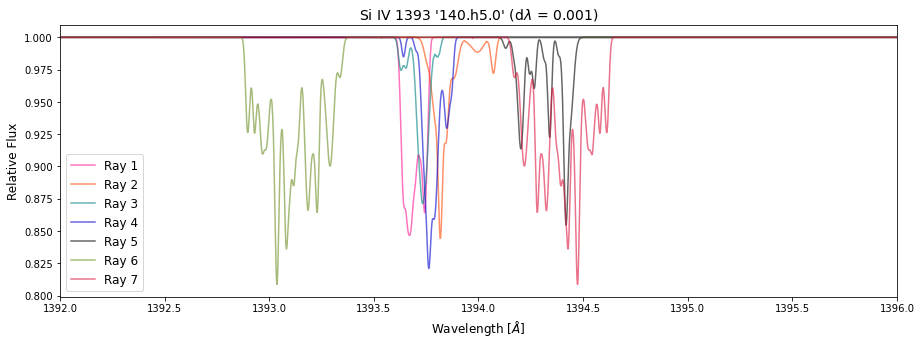

In [15]:
spec(rays, 1392, 1396, el='Si', rom_num='IV', lrest=1393.7550, gamma=9.0E+8, 
     f_value=5.24E-01, DIY=True, dlam=0.001)

# C

## C II 1334

yt : [INFO     ] 2022-06-27 02:21:16,808 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:16,810 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:16,830 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2650.68it/s]
yt : [INFO     ] 2022-06-27 02:21:16,957 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:17,002 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:17,005 Creating C_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:17,008 Creating spectrum
Adding line - C II 1334 [1334.532000 A]: : 100%|██████████| 294/294 [00:00<00:00, 9988.38it/s]
yt : [INFO     ] 2022-06-27 02:21:17,070 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:17,114 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:17,117 Creating C_p1_number_density from ray's den

[array([[1.333000e+03, 1.333001e+03, 1.333002e+03, ..., 1.336998e+03,
         1.336999e+03, 1.337000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.333000e+03, 1.333001e+03, 1.333002e+03, ..., 1.336998e+03,
         1.336999e+03, 1.337000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.333000e+03, 1.333001e+03, 1.333002e+03, ..., 1.336998e+03,
         1.336999e+03, 1.337000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.333000e+03, 1.333001e+03, 1.333002e+03, ..., 1.336998e+03,
         1.336999e+03, 1.337000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.333000e+03, 1.333001e+03, 1.333002e+03, ..., 1.336998e+03,
         1.336999e+03, 1.337000e+03],
        [1.000000e+0

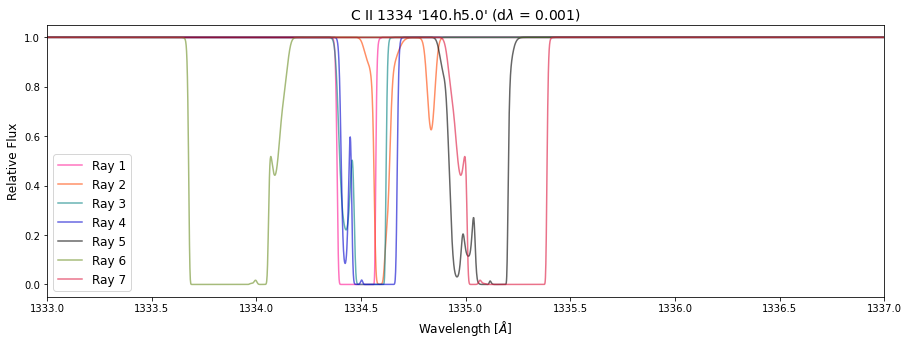

In [16]:
spec(rays, 1333, 1337, el='C', rom_num='II', lrest=1334.5320,
    gamma=2.38E+08, f_value=1.27E-01, DIY=True)

## C III 977

yt : [INFO     ] 2022-06-27 02:21:18,159 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:18,162 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:18,173 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 2784.05it/s]
yt : [INFO     ] 2022-06-27 02:21:18,386 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:18,430 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:18,432 Creating C_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:18,435 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 294/294 [00:00<00:00, 9000.39it/s]
yt : [INFO     ] 2022-06-27 02:21:18,531 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:18,575 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:18,577 Creating C_p2_number_density from ray's densi

[array([[975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[975.   , 975.001, 975.002, ..., 978.998, 978.999, 979.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

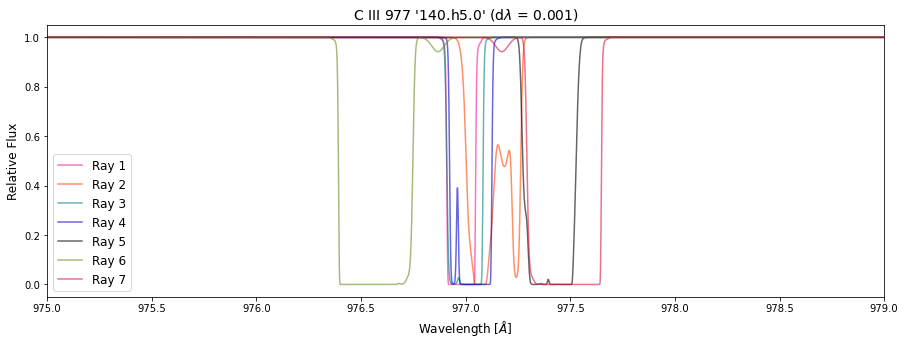

In [17]:
spec(rays, 975, 979, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, dlam=0.001)

yt : [INFO     ] 2022-06-27 02:21:20,134 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:20,137 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 2854.06it/s]
yt : [INFO     ] 2022-06-27 02:21:20,347 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:20,370 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:20,373 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 294/294 [00:00<00:00, 9205.59it/s]
yt : [INFO     ] 2022-06-27 02:21:20,469 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:20,492 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:20,495 Creating spectrum
Adding line - C III 977 [977.020100 A]: : 100%|██████████| 256/256 [00:00<00:00, 8796.12it/s]
yt : [INFO     ] 2022-06-27 02:21:20,585 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:20,608 Setting instrument to Custom
yt : [INFO  

[array([[976.   , 976.001, 976.002, ..., 977.998, 977.999, 978.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[976.   , 976.001, 976.002, ..., 977.998, 977.999, 978.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[976.   , 976.001, 976.002, ..., 977.998, 977.999, 978.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[976.   , 976.001, 976.002, ..., 977.998, 977.999, 978.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[976.   , 976.001, 976.002, ..., 977.998, 977.999, 978.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[976.   , 976.001, 976.002, ..., 977.998, 977.999, 978.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[976.   , 976.001, 976.002, ..., 977.998, 977.999, 978.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

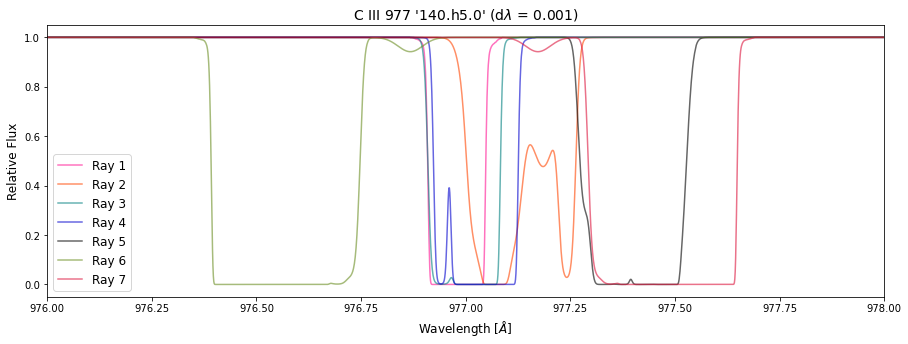

In [18]:
spec(rays, 976, 978, el='C', rom_num='III', lrest=977.0201,
    gamma=1.79E+09, f_value=7.67E-01, DIY=True, dlam=0.001)

## C IV 1548

yt : [INFO     ] 2022-06-27 02:21:21,913 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:21,916 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:21,928 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 256/256 [00:00<00:00, 5742.73it/s]
yt : [INFO     ] 2022-06-27 02:21:22,002 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:22,035 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:22,038 Creating C_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:22,041 Creating spectrum
Adding line - C IV 1548 [1548.187000 A]: : 100%|██████████| 294/294 [00:00<00:00, 4909.23it/s]
yt : [INFO     ] 2022-06-27 02:21:22,131 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:22,164 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:22,167 Creating C_p3_number_density from ray's den

[array([[1.547000e+03, 1.547001e+03, 1.547002e+03, ..., 1.549998e+03,
         1.549999e+03, 1.550000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.547000e+03, 1.547001e+03, 1.547002e+03, ..., 1.549998e+03,
         1.549999e+03, 1.550000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.547000e+03, 1.547001e+03, 1.547002e+03, ..., 1.549998e+03,
         1.549999e+03, 1.550000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.547000e+03, 1.547001e+03, 1.547002e+03, ..., 1.549998e+03,
         1.549999e+03, 1.550000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.547000e+03, 1.547001e+03, 1.547002e+03, ..., 1.549998e+03,
         1.549999e+03, 1.550000e+03],
        [1.000000e+0

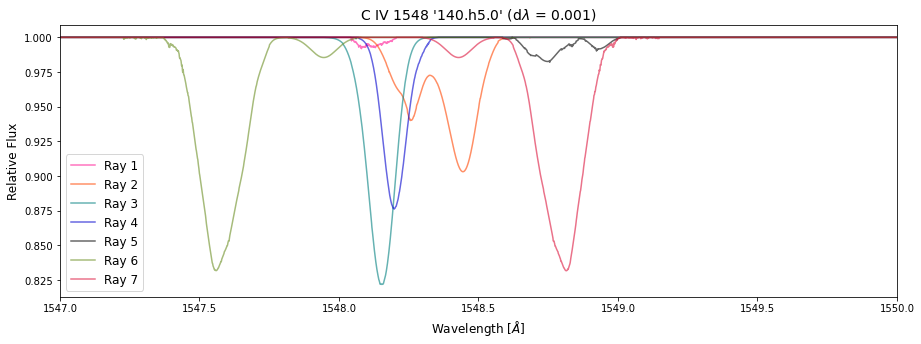

In [19]:
spec(rays, 1547,1550, line='C IV 1548', dlam=0.001)

# O

## O I 1302

yt : [INFO     ] 2022-06-27 02:21:23,101 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:23,104 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:23,128 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2916.14it/s]
yt : [INFO     ] 2022-06-27 02:21:23,246 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:23,290 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:23,292 Creating O_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:23,295 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 294/294 [00:00<00:00, 16217.01it/s]
yt : [INFO     ] 2022-06-27 02:21:23,344 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:23,388 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:23,391 Creating O_number_density from ray's density, temp

[array([[1.300000e+03, 1.300001e+03, 1.300002e+03, ..., 1.303998e+03,
         1.303999e+03, 1.304000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.300000e+03, 1.300001e+03, 1.300002e+03, ..., 1.303998e+03,
         1.303999e+03, 1.304000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.300000e+03, 1.300001e+03, 1.300002e+03, ..., 1.303998e+03,
         1.303999e+03, 1.304000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.300000e+03, 1.300001e+03, 1.300002e+03, ..., 1.303998e+03,
         1.303999e+03, 1.304000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.300000e+03, 1.300001e+03, 1.300002e+03, ..., 1.303998e+03,
         1.303999e+03, 1.304000e+03],
        [1.000000e+0

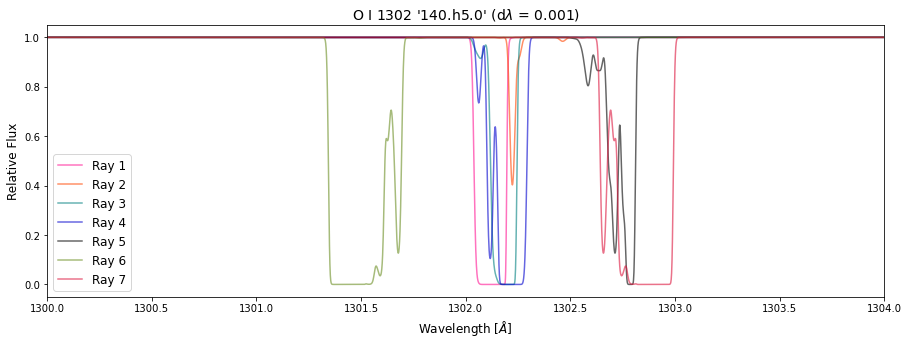

In [20]:
spec(rays, 1300, 1304, line='O I 1302')

yt : [INFO     ] 2022-06-27 02:21:24,437 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:24,439 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2874.20it/s]
yt : [INFO     ] 2022-06-27 02:21:24,557 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:24,580 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:24,583 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 294/294 [00:00<00:00, 16390.53it/s]
yt : [INFO     ] 2022-06-27 02:21:24,630 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:24,653 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:24,656 Creating spectrum
Adding line - O I 1302 [1302.168000 A]: : 100%|██████████| 256/256 [00:00<00:00, 11201.61it/s]
yt : [INFO     ] 2022-06-27 02:21:24,708 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:24,731 Setting instrument to Custom
yt : [INFO

[array([[1.301500e+03, 1.301501e+03, 1.301502e+03, ..., 1.303498e+03,
         1.303499e+03, 1.303500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.301500e+03, 1.301501e+03, 1.301502e+03, ..., 1.303498e+03,
         1.303499e+03, 1.303500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.301500e+03, 1.301501e+03, 1.301502e+03, ..., 1.303498e+03,
         1.303499e+03, 1.303500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.301500e+03, 1.301501e+03, 1.301502e+03, ..., 1.303498e+03,
         1.303499e+03, 1.303500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.301500e+03, 1.301501e+03, 1.301502e+03, ..., 1.303498e+03,
         1.303499e+03, 1.303500e+03],
        [1.000000e+0

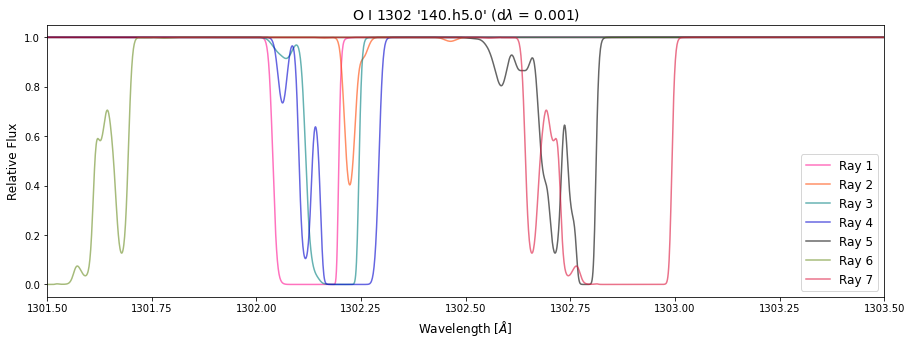

In [21]:
spec(rays, 1301.5, 1303.5, line='O I 1302')

## O II 702

yt : [INFO     ] 2022-06-27 02:21:25,509 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:25,512 Creating O_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:25,526 Creating spectrum
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 256/256 [00:00<00:00, 2926.42it/s]
yt : [INFO     ] 2022-06-27 02:21:25,733 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:25,776 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:25,779 Creating O_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:25,781 Creating spectrum
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 294/294 [00:00<00:00, 10690.94it/s]
yt : [INFO     ] 2022-06-27 02:21:25,866 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:25,910 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:25,913 Creating O_p1_number_density from ray's densit

[array([[833.   , 833.001, 833.002, ..., 836.998, 836.999, 837.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[833.   , 833.001, 833.002, ..., 836.998, 836.999, 837.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[833.   , 833.001, 833.002, ..., 836.998, 836.999, 837.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[833.   , 833.001, 833.002, ..., 836.998, 836.999, 837.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[833.   , 833.001, 833.002, ..., 836.998, 836.999, 837.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[833.   , 833.001, 833.002, ..., 836.998, 836.999, 837.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[833.   , 833.001, 833.002, ..., 836.998, 836.999, 837.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

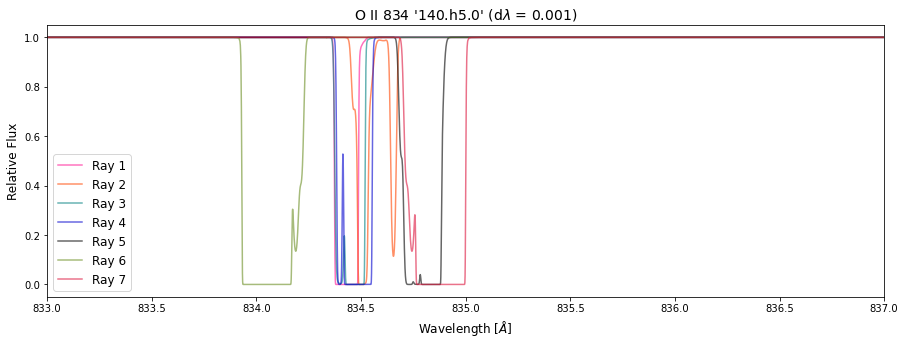

In [22]:
spec(rays, 833, 837, el='O', rom_num='II', lrest=834.4654,
    gamma=8.43E+08, f_value=1.32E-01, DIY=True)

yt : [INFO     ] 2022-06-27 02:21:27,350 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:27,354 Creating spectrum
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 256/256 [00:00<00:00, 2838.80it/s]
yt : [INFO     ] 2022-06-27 02:21:27,569 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:27,582 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:27,585 Creating spectrum
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 294/294 [00:00<00:00, 9618.76it/s]
yt : [INFO     ] 2022-06-27 02:21:27,677 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:27,690 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:27,693 Creating spectrum
Adding line - O II 834 [834.465400 A]: : 100%|██████████| 256/256 [00:00<00:00, 8382.26it/s]
yt : [INFO     ] 2022-06-27 02:21:27,784 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:27,799 Setting instrument to Custom
yt : [INFO     

[array([[834.1  , 834.101, 834.102, ..., 835.098, 835.099, 835.1  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[834.1  , 834.101, 834.102, ..., 835.098, 835.099, 835.1  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[834.1  , 834.101, 834.102, ..., 835.098, 835.099, 835.1  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[834.1  , 834.101, 834.102, ..., 835.098, 835.099, 835.1  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[834.1  , 834.101, 834.102, ..., 835.098, 835.099, 835.1  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[8.341000e+02, 8.341010e+02, 8.341020e+02, ..., 8.350980e+02,
         8.350990e+02, 8.351000e+02],
        [3.351173e-23, 2.446496e-21, 2.467959e-19, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[834.1  , 834.101, 834.102, ..., 835.098, 835.099, 835.1  ],
        [  1.

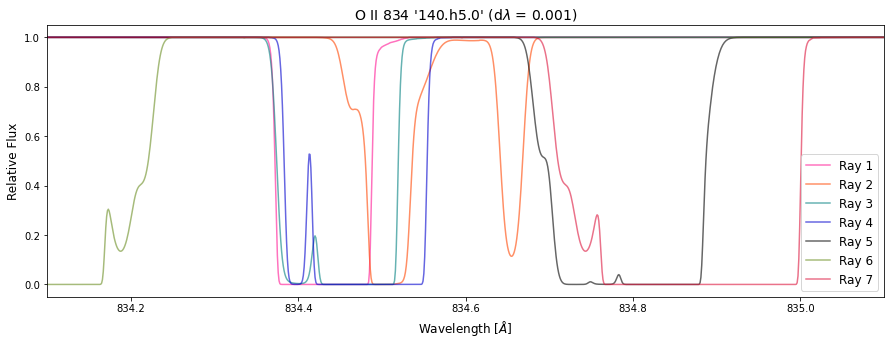

In [23]:
spec(rays, 834.1, 835.1, el='O', rom_num='II', lrest=834.4654,
    gamma=8.43E+08, f_value=1.32E-01, DIY=True)

## O III 702

yt : [INFO     ] 2022-06-27 02:21:28,968 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:28,971 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:28,987 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3825.17it/s]
yt : [INFO     ] 2022-06-27 02:21:29,149 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:29,194 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:29,197 Creating O_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:29,201 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 294/294 [00:00<00:00, 10133.00it/s]
yt : [INFO     ] 2022-06-27 02:21:29,289 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:29,336 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:29,339 Creating O_p2_number_density from ray's dens

[array([[700.   , 700.001, 700.002, ..., 703.998, 703.999, 704.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[700.   , 700.001, 700.002, ..., 703.998, 703.999, 704.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[700.   , 700.001, 700.002, ..., 703.998, 703.999, 704.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[700.   , 700.001, 700.002, ..., 703.998, 703.999, 704.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[700.   , 700.001, 700.002, ..., 703.998, 703.999, 704.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[700.   , 700.001, 700.002, ..., 703.998, 703.999, 704.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[700.   , 700.001, 700.002, ..., 703.998, 703.999, 704.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

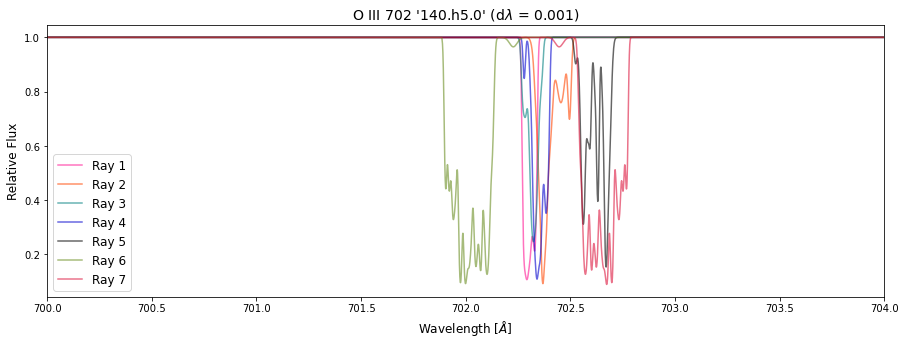

In [24]:
spec(rays, 700, 704, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True)

yt : [INFO     ] 2022-06-27 02:21:30,638 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:30,641 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3906.66it/s]
yt : [INFO     ] 2022-06-27 02:21:30,801 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:30,817 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:30,820 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 294/294 [00:00<00:00, 10449.15it/s]
yt : [INFO     ] 2022-06-27 02:21:30,906 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:30,921 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:30,924 Creating spectrum
Adding line - O III 702 [702.337000 A]: : 100%|██████████| 256/256 [00:00<00:00, 10921.89it/s]
yt : [INFO     ] 2022-06-27 02:21:31,002 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:31,017 Setting instrument to Custom
yt : [INFO

[array([[701.75 , 701.751, 701.752, ..., 702.998, 702.999, 703.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[701.75 , 701.751, 701.752, ..., 702.998, 702.999, 703.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[701.75 , 701.751, 701.752, ..., 702.998, 702.999, 703.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[701.75 , 701.751, 701.752, ..., 702.998, 702.999, 703.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[701.75 , 701.751, 701.752, ..., 702.998, 702.999, 703.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[701.75 , 701.751, 701.752, ..., 702.998, 702.999, 703.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[701.75 , 701.751, 701.752, ..., 702.998, 702.999, 703.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

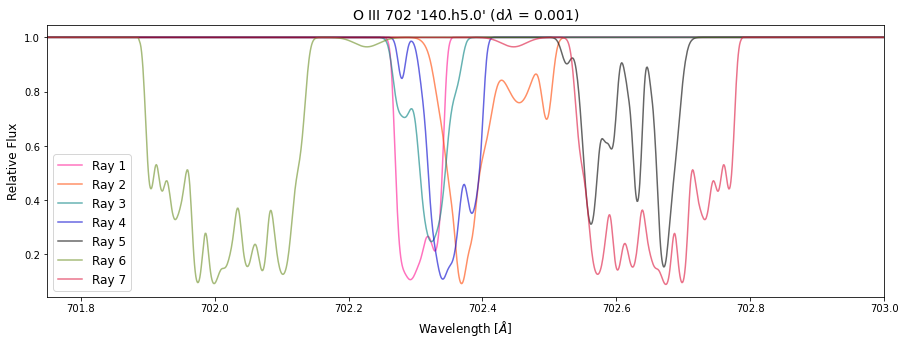

In [25]:
spec(rays, 701.75, 703, el='O', rom_num='III', lrest=702.3370,
    gamma=6.17E+08, f_value=1.37E-01, DIY=True)

## O III 507

yt : [INFO     ] 2022-06-27 02:21:32,043 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:32,046 Creating spectrum
Adding line - O III 507 [507.388300 A]: : 100%|██████████| 256/256 [00:00<00:00, 4323.75it/s]
yt : [INFO     ] 2022-06-27 02:21:32,136 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:32,180 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:32,183 Creating spectrum
Adding line - O III 507 [507.388300 A]: : 100%|██████████| 294/294 [00:00<00:00, 11943.80it/s]
yt : [INFO     ] 2022-06-27 02:21:32,236 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:32,280 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:32,283 Creating spectrum
Adding line - O III 507 [507.388300 A]: : 100%|██████████| 256/256 [00:00<00:00, 12000.20it/s]
yt : [INFO     ] 2022-06-27 02:21:32,332 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:32,376 Setting instrument to Custom
yt : [INFO

[array([[505.   , 505.001, 505.002, ..., 508.998, 508.999, 509.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[505.   , 505.001, 505.002, ..., 508.998, 508.999, 509.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[505.   , 505.001, 505.002, ..., 508.998, 508.999, 509.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[505.   , 505.001, 505.002, ..., 508.998, 508.999, 509.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[505.   , 505.001, 505.002, ..., 508.998, 508.999, 509.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[505.   , 505.001, 505.002, ..., 508.998, 508.999, 509.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[505.   , 505.001, 505.002, ..., 508.998, 508.999, 509.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

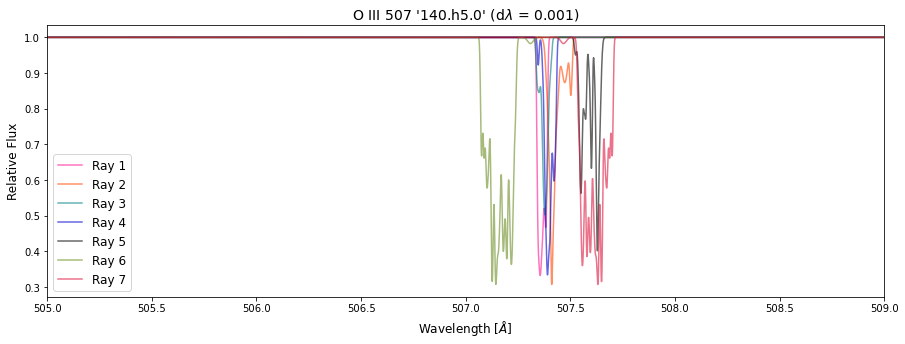

In [26]:
spec(rays, 505, 509, el='O', rom_num='III', lrest=507.3883,
    gamma=1.60E+09, f_value=1.85E-01, DIY=True)

yt : [INFO     ] 2022-06-27 02:21:33,166 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:33,169 Creating spectrum
Adding line - O III 507 [507.388300 A]: : 100%|██████████| 256/256 [00:00<00:00, 4298.47it/s]
yt : [INFO     ] 2022-06-27 02:21:33,258 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:33,270 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:33,273 Creating spectrum
Adding line - O III 507 [507.388300 A]: : 100%|██████████| 294/294 [00:00<00:00, 12078.33it/s]
yt : [INFO     ] 2022-06-27 02:21:33,326 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:33,338 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:33,342 Creating spectrum
Adding line - O III 507 [507.388300 A]: : 100%|██████████| 256/256 [00:00<00:00, 11645.92it/s]
yt : [INFO     ] 2022-06-27 02:21:33,394 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:33,406 Setting instrument to Custom
yt : [INFO

[array([[507.   , 507.001, 507.002, ..., 507.998, 507.999, 508.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[507.   , 507.001, 507.002, ..., 507.998, 507.999, 508.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[507.   , 507.001, 507.002, ..., 507.998, 507.999, 508.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[507.   , 507.001, 507.002, ..., 507.998, 507.999, 508.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[507.   , 507.001, 507.002, ..., 507.998, 507.999, 508.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[507.   , 507.001, 507.002, ..., 507.998, 507.999, 508.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[507.   , 507.001, 507.002, ..., 507.998, 507.999, 508.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

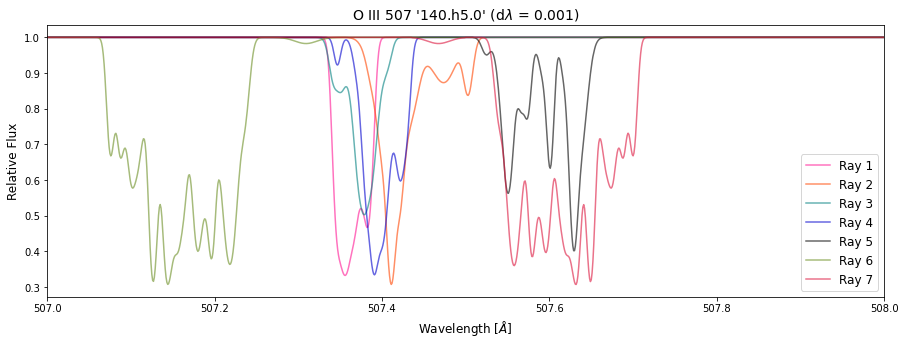

In [27]:
spec(rays, 507, 508, el='O', rom_num='III', lrest=507.3883,
    gamma=1.60E+09, f_value=1.85E-01, DIY=True)

# Al

## Al II 1670

yt : [INFO     ] 2022-06-27 02:21:34,056 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:34,058 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:34,088 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 256/256 [00:00<00:00, 2722.41it/s]
yt : [INFO     ] 2022-06-27 02:21:34,211 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:34,254 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:34,256 Creating Al_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:34,260 Creating spectrum
Adding line - Al II 1671 [1670.787400 A]: : 100%|██████████| 294/294 [00:00<00:00, 12297.56it/s]
yt : [INFO     ] 2022-06-27 02:21:34,313 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:34,360 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:34,363 Creating Al_p1_number_density from ray

[array([[1.669000e+03, 1.669001e+03, 1.669002e+03, ..., 1.672998e+03,
         1.672999e+03, 1.673000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.669000e+03, 1.669001e+03, 1.669002e+03, ..., 1.672998e+03,
         1.672999e+03, 1.673000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.669000e+03, 1.669001e+03, 1.669002e+03, ..., 1.672998e+03,
         1.672999e+03, 1.673000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.669000e+03, 1.669001e+03, 1.669002e+03, ..., 1.672998e+03,
         1.672999e+03, 1.673000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.669000e+03, 1.669001e+03, 1.669002e+03, ..., 1.672998e+03,
         1.672999e+03, 1.673000e+03],
        [1.000000e+0

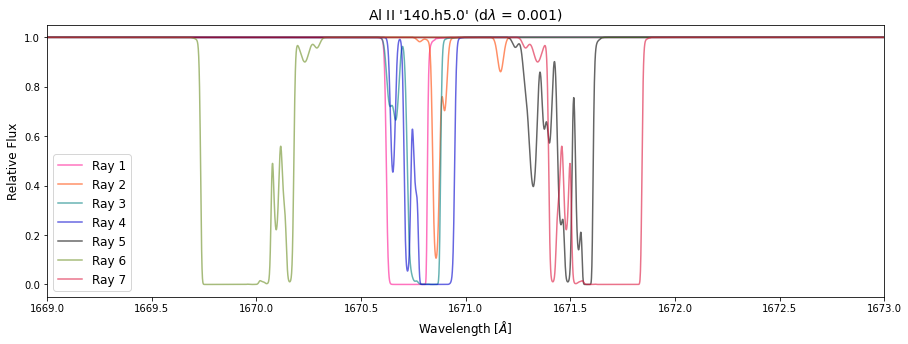

In [28]:
spec(rays, 1669, 1673, line='Al II')

## Al III 1854

yt : [INFO     ] 2022-06-27 02:21:35,373 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:35,376 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:35,396 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 256/256 [00:00<00:00, 3655.63it/s]
yt : [INFO     ] 2022-06-27 02:21:35,496 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:35,539 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:35,542 Creating Al_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:35,544 Creating spectrum
Adding line - Al III 1854 [1854.720000 A]: : 100%|██████████| 294/294 [00:00<00:00, 14861.41it/s]
yt : [INFO     ] 2022-06-27 02:21:35,593 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:35,637 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:35,639 Creating Al_p2_number_density from r

[array([[1.853500e+03, 1.853501e+03, 1.853502e+03, ..., 1.857498e+03,
         1.857499e+03, 1.857500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.853500e+03, 1.853501e+03, 1.853502e+03, ..., 1.857498e+03,
         1.857499e+03, 1.857500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.853500e+03, 1.853501e+03, 1.853502e+03, ..., 1.857498e+03,
         1.857499e+03, 1.857500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.853500e+03, 1.853501e+03, 1.853502e+03, ..., 1.857498e+03,
         1.857499e+03, 1.857500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.853500e+03, 1.853501e+03, 1.853502e+03, ..., 1.857498e+03,
         1.857499e+03, 1.857500e+03],
        [1.000000e+0

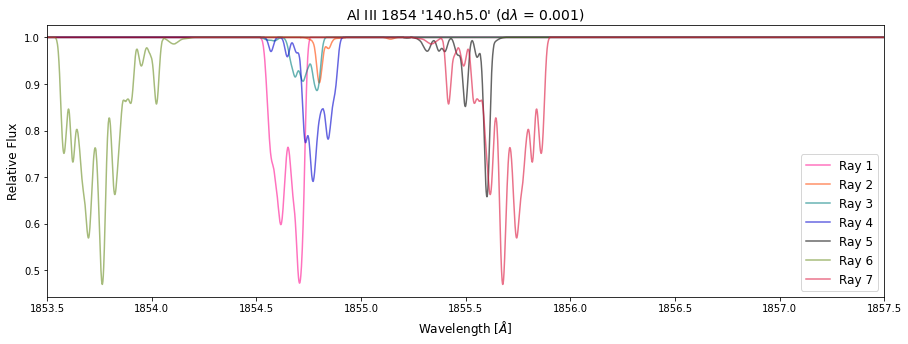

In [29]:
spec(rays, 1853.5,1857.5,el='Al',rom_num='III',lrest=1854.72, 
     gamma=5.57E+08, f_value=5.75E-01, DIY=True, dlam=0.001)

## Al IV 160

yt : [INFO     ] 2022-06-27 02:21:36,562 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:36,565 Creating Al_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:36,585 Creating spectrum
Adding line - Al IV 160 [160.072400 A]: : 100%|██████████| 256/256 [00:00<00:00, 4536.13it/s]
yt : [INFO     ] 2022-06-27 02:21:36,669 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:36,697 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:36,700 Creating Al_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:36,703 Creating spectrum
Adding line - Al IV 160 [160.072400 A]: : 100%|██████████| 294/294 [00:00<00:00, 19712.03it/s]
yt : [INFO     ] 2022-06-27 02:21:36,747 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:36,775 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:36,778 Creating Al_p3_number_density from ray's d

[array([[160.    , 160.0001, 160.0002, ..., 160.2498, 160.2499, 160.25  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[160.    , 160.0001, 160.0002, ..., 160.2498, 160.2499, 160.25  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[160.    , 160.0001, 160.0002, ..., 160.2498, 160.2499, 160.25  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[160.    , 160.0001, 160.0002, ..., 160.2498, 160.2499, 160.25  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[160.    , 160.0001, 160.0002, ..., 160.2498, 160.2499, 160.25  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[160.       , 160.0001   , 160.0002   , ..., 160.2498   ,
         160.2499   , 160.25     ],
        [  0.9897274,   0.9898772,   0.9913509, ...,   1.       ,
           1.       ,   1.       ]]),
 array([[160.    , 160.0001, 160.0

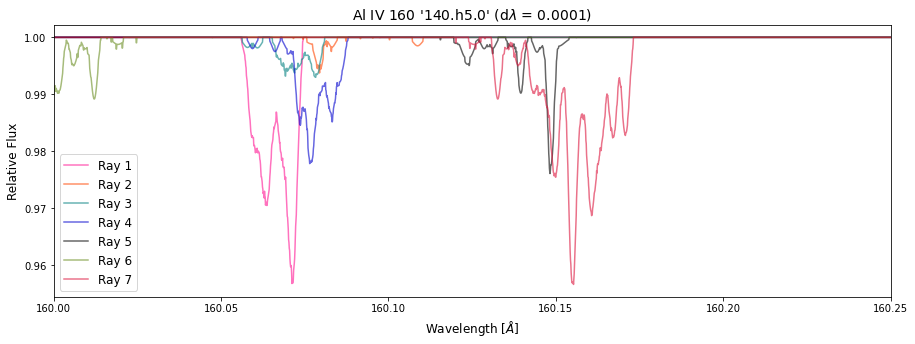

In [30]:
spec(rays, 160,160.25,el='Al',rom_num='IV',lrest=160.0724, 
     gamma=2.13E+10, f_value=2.45E-01, DIY=True, dlam=0.0001)

yt : [INFO     ] 2022-06-27 02:21:37,573 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:37,576 Creating spectrum
yt : [INFO     ] 2022-06-27 02:21:37,606 79 out of 256 line components will be deposited as unresolved lines.
Adding line - Al IV 160 [160.072400 A]: : 100%|██████████| 256/256 [00:00<00:00, 11282.12it/s]
yt : [INFO     ] 2022-06-27 02:21:37,629 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:37,631 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:37,634 Creating spectrum
yt : [INFO     ] 2022-06-27 02:21:37,663 20 out of 294 line components will be deposited as unresolved lines.
Adding line - Al IV 160 [160.072400 A]: : 100%|██████████| 294/294 [00:00<00:00, 21783.97it/s]
yt : [INFO     ] 2022-06-27 02:21:37,678 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:37,681 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:37,684 Creating spectrum
yt : [INFO     ] 2022-06-27 02:21:37,

[array([[160.       , 160.01     , 160.02     , 160.03     , 160.04     ,
         160.05     , 160.06     , 160.07     , 160.08     , 160.09     ,
         160.1      , 160.11     , 160.12     , 160.13     , 160.14     ,
         160.15     , 160.16     , 160.17     , 160.18     , 160.19     ,
         160.2      , 160.21     , 160.22     , 160.23     , 160.24     ,
         160.25     ],
        [  1.       ,   1.       ,   1.       ,   1.       ,   1.       ,
           0.9959102,   0.9755583,   0.9860429,   0.9999952,   0.9999994,
           1.       ,   1.       ,   1.       ,   1.       ,   1.       ,
           1.       ,   1.       ,   1.       ,   1.       ,   1.       ,
           1.       ,   1.       ,   1.       ,   1.       ,   1.       ,
           1.       ]]),
 array([[160.       , 160.01     , 160.02     , 160.03     , 160.04     ,
         160.05     , 160.06     , 160.07     , 160.08     , 160.09     ,
         160.1      , 160.11     , 160.12     , 160.13     , 160

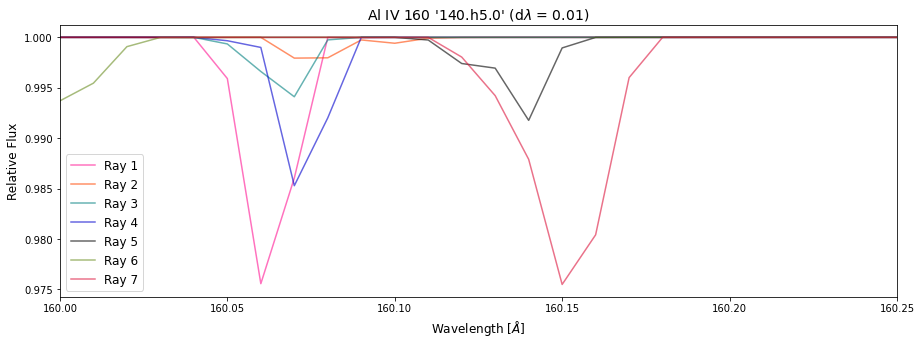

In [31]:
spec(rays, 160,160.25,el='Al',rom_num='IV',lrest=160.0724, 
     gamma=2.13E+10, f_value=2.45E-01, DIY=True, dlam=0.01)

## Al IV 129

yt : [INFO     ] 2022-06-27 02:21:38,141 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:38,144 Creating spectrum
Adding line - Al IV 129 [129.729100 A]: : 100%|██████████| 256/256 [00:00<00:00, 4347.59it/s]
yt : [INFO     ] 2022-06-27 02:21:38,232 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:38,255 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:38,258 Creating spectrum
Adding line - Al IV 129 [129.729100 A]: : 100%|██████████| 294/294 [00:00<00:00, 15758.19it/s]
yt : [INFO     ] 2022-06-27 02:21:38,306 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:38,329 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:38,332 Creating spectrum
Adding line - Al IV 129 [129.729100 A]: : 100%|██████████| 256/256 [00:00<00:00, 11685.21it/s]
yt : [INFO     ] 2022-06-27 02:21:38,383 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:38,406 Setting instrument to Custom
yt : [INFO

[array([[129.65  , 129.6501, 129.6502, ..., 129.8498, 129.8499, 129.85  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[129.65  , 129.6501, 129.6502, ..., 129.8498, 129.8499, 129.85  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[129.65  , 129.6501, 129.6502, ..., 129.8498, 129.8499, 129.85  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[129.65  , 129.6501, 129.6502, ..., 129.8498, 129.8499, 129.85  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[129.65  , 129.6501, 129.6502, ..., 129.8498, 129.8499, 129.85  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[129.65     , 129.6501   , 129.6502   , ..., 129.8498   ,
         129.8499   , 129.85     ],
        [  0.9640816,   0.9660505,   0.9674215, ...,   1.       ,
           1.       ,   1.       ]]),
 array([[129.65  , 129.6501, 129.6

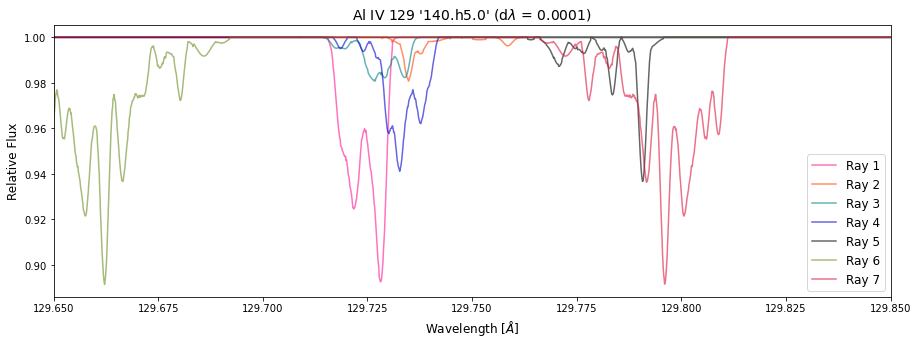

In [32]:
spec(rays, 129.65,129.85,el='Al',rom_num='IV',lrest=129.7291, 
     gamma=1.03E+11, f_value=7.78E-01, DIY=True, dlam=0.0001)

# Fe

## Fe II 2600

yt : [INFO     ] 2022-06-27 02:21:39,086 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:39,089 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:39,149 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 256/256 [00:00<00:00, 2528.19it/s]
yt : [INFO     ] 2022-06-27 02:21:39,282 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:39,327 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:39,330 Creating Fe_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:39,333 Creating spectrum
Adding line - Fe II 2600 [2600.170000 A]: : 100%|██████████| 294/294 [00:00<00:00, 13459.72it/s]
yt : [INFO     ] 2022-06-27 02:21:39,384 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:39,428 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:39,431 Creating Fe_p1_number_density from ray

[array([[2.599000e+03, 2.599001e+03, 2.599002e+03, ..., 2.602998e+03,
         2.602999e+03, 2.603000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.599000e+03, 2.599001e+03, 2.599002e+03, ..., 2.602998e+03,
         2.602999e+03, 2.603000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.599000e+03, 2.599001e+03, 2.599002e+03, ..., 2.602998e+03,
         2.602999e+03, 2.603000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.599000e+03, 2.599001e+03, 2.599002e+03, ..., 2.602998e+03,
         2.602999e+03, 2.603000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.599000e+03, 2.599001e+03, 2.599002e+03, ..., 2.602998e+03,
         2.602999e+03, 2.603000e+03],
        [1.000000e+0

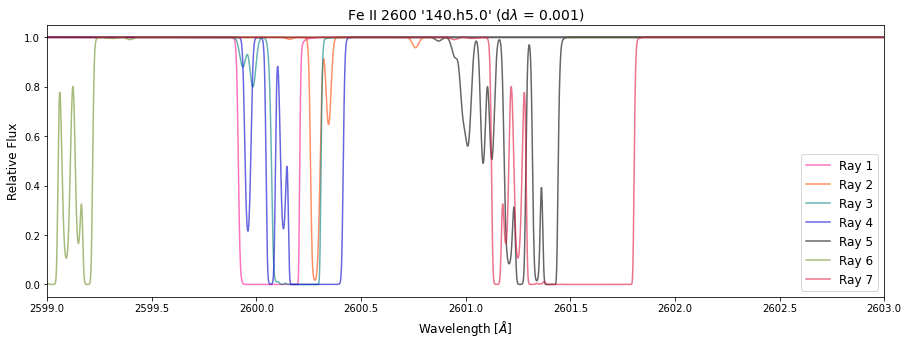

In [33]:
spec(rays, 2599,2603,
    el='Fe', rom_num='II', lrest=2600.17, gamma=2.37E+08, f_value=2.4E-01, DIY=True)

## Fe III 1122

yt : [INFO     ] 2022-06-27 02:21:40,430 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:40,432 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:40,466 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 3709.27it/s]
yt : [INFO     ] 2022-06-27 02:21:40,564 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:40,610 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:40,612 Creating Fe_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:40,615 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 294/294 [00:00<00:00, 13293.58it/s]
yt : [INFO     ] 2022-06-27 02:21:40,668 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:40,713 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:40,716 Creating Fe_p2_number_density from r

[array([[1.121000e+03, 1.121001e+03, 1.121002e+03, ..., 1.124998e+03,
         1.124999e+03, 1.125000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.121000e+03, 1.121001e+03, 1.121002e+03, ..., 1.124998e+03,
         1.124999e+03, 1.125000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.121000e+03, 1.121001e+03, 1.121002e+03, ..., 1.124998e+03,
         1.124999e+03, 1.125000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.121000e+03, 1.121001e+03, 1.121002e+03, ..., 1.124998e+03,
         1.124999e+03, 1.125000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.121000e+03, 1.121001e+03, 1.121002e+03, ..., 1.124998e+03,
         1.124999e+03, 1.125000e+03],
        [1.000000e+0

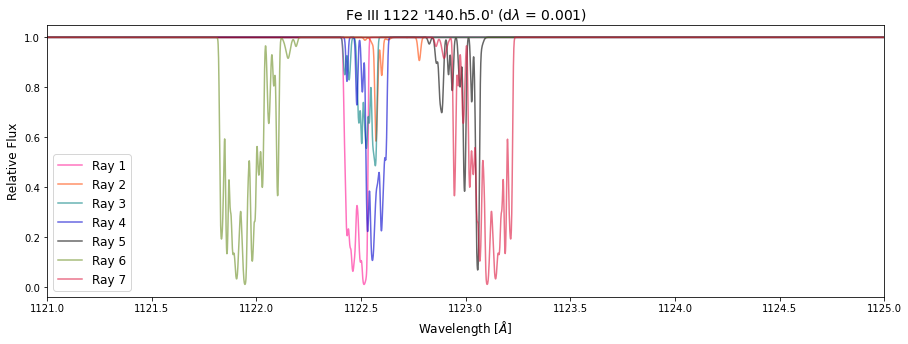

In [34]:
spec(rays, 1121,1125,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True)

yt : [INFO     ] 2022-06-27 02:21:41,626 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:41,629 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 3781.39it/s]
yt : [INFO     ] 2022-06-27 02:21:41,726 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:41,743 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:41,747 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 294/294 [00:00<00:00, 13603.00it/s]
yt : [INFO     ] 2022-06-27 02:21:41,798 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:41,815 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:41,819 Creating spectrum
Adding line - Fe III 1122 [1122.524100 A]: : 100%|██████████| 256/256 [00:00<00:00, 11226.91it/s]
yt : [INFO     ] 2022-06-27 02:21:41,871 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:41,889 Setting instrument to Custom
y

[array([[1.122000e+03, 1.122001e+03, 1.122002e+03, ..., 1.123498e+03,
         1.123499e+03, 1.123500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.122000e+03, 1.122001e+03, 1.122002e+03, ..., 1.123498e+03,
         1.123499e+03, 1.123500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.122000e+03, 1.122001e+03, 1.122002e+03, ..., 1.123498e+03,
         1.123499e+03, 1.123500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.122000e+03, 1.122001e+03, 1.122002e+03, ..., 1.123498e+03,
         1.123499e+03, 1.123500e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[1.122000e+03, 1.122001e+03, 1.122002e+03, ..., 1.123498e+03,
         1.123499e+03, 1.123500e+03],
        [1.000000e+0

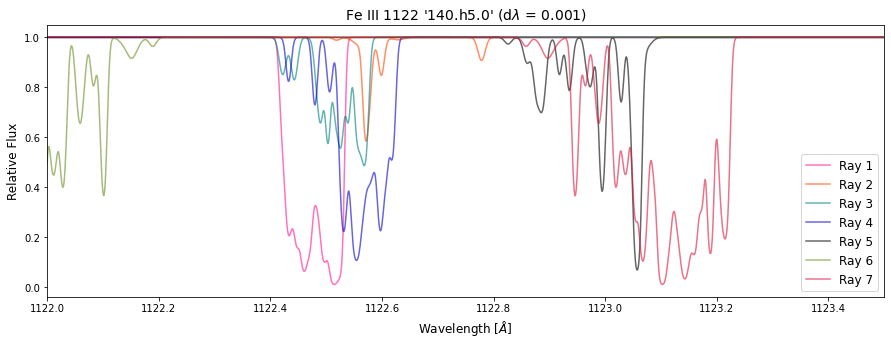

In [35]:
spec(rays, 1122,1123.5,
    el='Fe', rom_num='III', lrest=1122.5241, gamma=5.42E+08, f_value=7.97E-02, DIY=True)

## Fe IV 526

yt : [INFO     ] 2022-06-27 02:21:42,562 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:42,565 Creating Fe_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:42,599 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 7017.37it/s]
yt : [INFO     ] 2022-06-27 02:21:42,663 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:42,707 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:42,709 Creating Fe_p3_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:42,712 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 294/294 [00:00<00:00, 14342.84it/s]
yt : [INFO     ] 2022-06-27 02:21:42,762 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:42,806 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:42,809 Creating Fe_p3_number_density from ray's d

[array([[524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[524.   , 524.001, 524.002, ..., 527.998, 527.999, 528.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

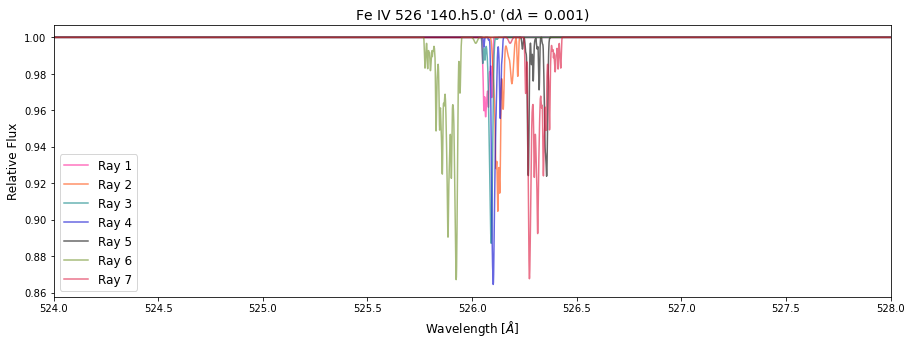

In [36]:
spec(rays, 524,528,
    el='Fe', rom_num='IV', lrest=526.0996, gamma=3.31E+09, f_value=4.12E-01, DIY=True)

yt : [INFO     ] 2022-06-27 02:21:43,597 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:43,600 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 6906.60it/s]
yt : [INFO     ] 2022-06-27 02:21:43,666 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:43,679 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:43,683 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 294/294 [00:00<00:00, 13733.90it/s]
yt : [INFO     ] 2022-06-27 02:21:43,733 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:43,745 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:43,749 Creating spectrum
Adding line - Fe IV 526 [526.099600 A]: : 100%|██████████| 256/256 [00:00<00:00, 15791.71it/s]
yt : [INFO     ] 2022-06-27 02:21:43,794 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:43,807 Setting instrument to Custom
yt : [INFO

[array([[525.7  , 525.701, 525.702, ..., 526.698, 526.699, 526.7  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[525.7  , 525.701, 525.702, ..., 526.698, 526.699, 526.7  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[525.7  , 525.701, 525.702, ..., 526.698, 526.699, 526.7  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[525.7  , 525.701, 525.702, ..., 526.698, 526.699, 526.7  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[525.7  , 525.701, 525.702, ..., 526.698, 526.699, 526.7  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[525.7  , 525.701, 525.702, ..., 526.698, 526.699, 526.7  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[525.7  , 525.701, 525.702, ..., 526.698, 526.699, 526.7  ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

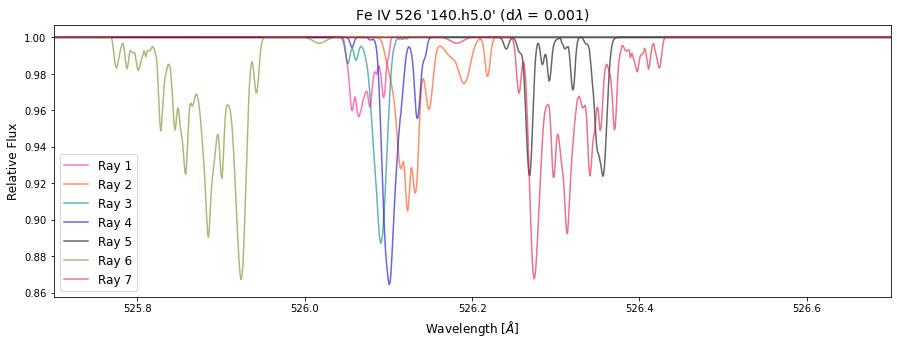

In [37]:
spec(rays, 525.7,526.7,
    el='Fe', rom_num='IV', lrest=526.0996, gamma=3.31E+09, f_value=4.12E-01, DIY=True)

# Mg

## Mg II 2796

yt : [INFO     ] 2022-06-27 02:21:44,361 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:44,364 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:44,392 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 256/256 [00:00<00:00, 1926.32it/s]
yt : [INFO     ] 2022-06-27 02:21:44,555 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:44,598 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:44,601 Creating Mg_p1_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:44,603 Creating spectrum
Adding line - Mg II 2796 [2796.350000 A]: : 100%|██████████| 294/294 [00:00<00:00, 11637.21it/s]
yt : [INFO     ] 2022-06-27 02:21:44,658 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:44,702 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:44,704 Creating Mg_p1_number_density from ray

[array([[2.795000e+03, 2.795001e+03, 2.795002e+03, ..., 2.798998e+03,
         2.798999e+03, 2.799000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.795000e+03, 2.795001e+03, 2.795002e+03, ..., 2.798998e+03,
         2.798999e+03, 2.799000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.795000e+03, 2.795001e+03, 2.795002e+03, ..., 2.798998e+03,
         2.798999e+03, 2.799000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.795000e+03, 2.795001e+03, 2.795002e+03, ..., 2.798998e+03,
         2.798999e+03, 2.799000e+03],
        [1.000000e+00, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
         1.000000e+00, 1.000000e+00]]),
 array([[2.795000e+03, 2.795001e+03, 2.795002e+03, ..., 2.798998e+03,
         2.798999e+03, 2.799000e+03],
        [1.000000e+0

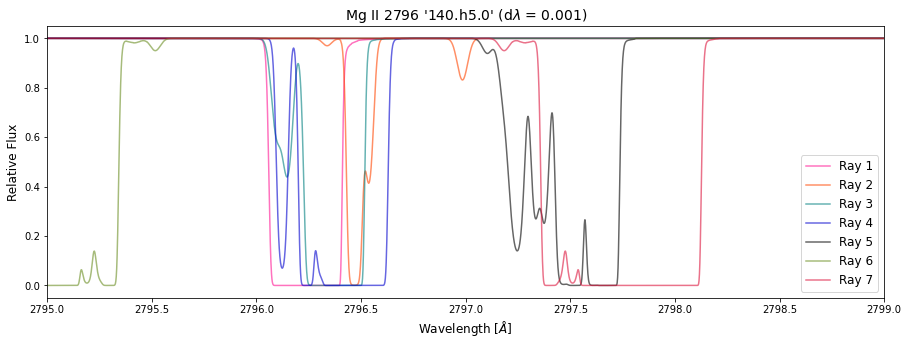

In [38]:
spec(rays, 2795,2799, 
     el='Mg', rom_num='II', lrest=2796.35, gamma=2.68E+08, f_value=6.29E-01, DIY=True)

## Mg III 231

yt : [INFO     ] 2022-06-27 02:21:45,849 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:45,852 Creating Mg_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:45,871 Creating spectrum
Adding line - Mg III 231 [231.733600 A]: : 100%|██████████| 256/256 [00:00<00:00, 5252.01it/s]
yt : [INFO     ] 2022-06-27 02:21:45,950 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:45,994 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:45,997 Creating Mg_p2_number_density from ray's density, temperature, metallicity.
yt : [INFO     ] 2022-06-27 02:21:46,003 Creating spectrum
Adding line - Mg III 231 [231.733600 A]: : 100%|██████████| 294/294 [00:00<00:00, 16457.69it/s]
yt : [INFO     ] 2022-06-27 02:21:46,057 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:46,102 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:46,105 Creating Mg_p2_number_density from ray's

[array([[229.   , 229.001, 229.002, ..., 232.998, 232.999, 233.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[229.   , 229.001, 229.002, ..., 232.998, 232.999, 233.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[229.   , 229.001, 229.002, ..., 232.998, 232.999, 233.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[229.   , 229.001, 229.002, ..., 232.998, 232.999, 233.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[229.   , 229.001, 229.002, ..., 232.998, 232.999, 233.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[229.   , 229.001, 229.002, ..., 232.998, 232.999, 233.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[229.   , 229.001, 229.002, ..., 232.998, 232.999, 233.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

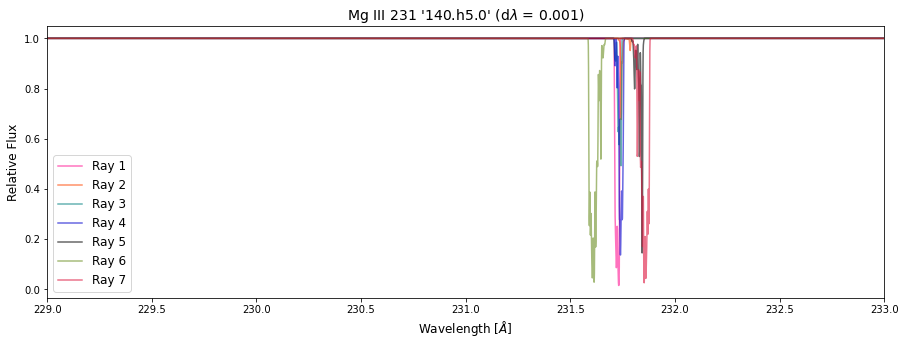

In [39]:
spec(rays, 229,233,
     el='Mg', rom_num='III', lrest=231.7336, gamma=9.90E+09, f_value=2.39E-01, DIY=True)

yt : [INFO     ] 2022-06-27 02:21:46,945 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:46,948 Creating spectrum
Adding line - Mg III 231 [231.733600 A]: : 100%|██████████| 256/256 [00:00<00:00, 5418.34it/s]
yt : [INFO     ] 2022-06-27 02:21:47,024 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:47,032 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:47,035 Creating spectrum
Adding line - Mg III 231 [231.733600 A]: : 100%|██████████| 294/294 [00:00<00:00, 16245.85it/s]
yt : [INFO     ] 2022-06-27 02:21:47,082 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:47,090 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:47,093 Creating spectrum
Adding line - Mg III 231 [231.733600 A]: : 100%|██████████| 256/256 [00:00<00:00, 13614.76it/s]
yt : [INFO     ] 2022-06-27 02:21:47,143 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:47,150 Setting instrument to Custom
yt : [I

[array([[231.5  , 231.501, 231.502, ..., 231.998, 231.999, 232.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[231.5  , 231.501, 231.502, ..., 231.998, 231.999, 232.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[231.5  , 231.501, 231.502, ..., 231.998, 231.999, 232.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[231.5  , 231.501, 231.502, ..., 231.998, 231.999, 232.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[231.5  , 231.501, 231.502, ..., 231.998, 231.999, 232.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[231.5  , 231.501, 231.502, ..., 231.998, 231.999, 232.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]]),
 array([[231.5  , 231.501, 231.502, ..., 231.998, 231.999, 232.   ],
        [  1.   ,   1.   ,   1.   , ...,   1.   ,   1.   ,   1.   ]])]

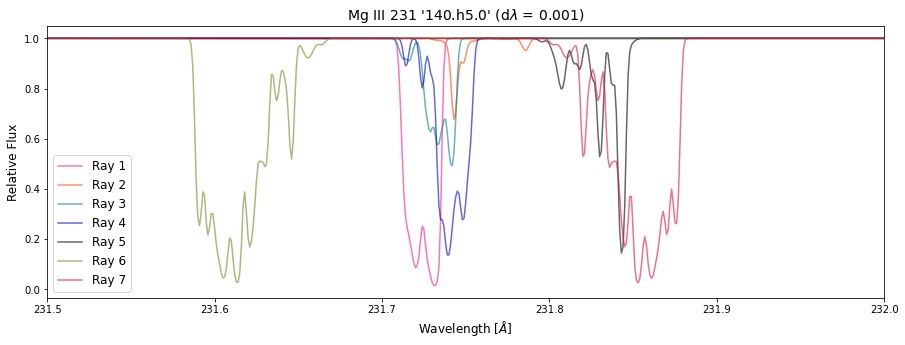

In [40]:
spec(rays, 231.5,232,
     el='Mg', rom_num='III', lrest=231.7336, gamma=9.90E+09, f_value=2.39E-01, DIY=True)

## Mg III 186

yt : [INFO     ] 2022-06-27 02:21:47,720 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:47,724 Creating spectrum
Adding line - Mg III 186 [186.514300 A]: : 100%|██████████| 256/256 [00:00<00:00, 2722.77it/s]
yt : [INFO     ] 2022-06-27 02:21:47,848 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:48,332 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:48,335 Creating spectrum
Adding line - Mg III 186 [186.514300 A]: : 100%|██████████| 294/294 [00:00<00:00, 10323.36it/s]
yt : [INFO     ] 2022-06-27 02:21:48,393 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:48,808 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:48,811 Creating spectrum
Adding line - Mg III 186 [186.514300 A]: : 100%|██████████| 256/256 [00:00<00:00, 8717.56it/s]
yt : [INFO     ] 2022-06-27 02:21:48,870 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:49,286 Setting instrument to Custom
yt : [IN

[array([[184.    , 184.0001, 184.0002, ..., 187.9998, 187.9999, 188.    ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[184.    , 184.0001, 184.0002, ..., 187.9998, 187.9999, 188.    ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[184.    , 184.0001, 184.0002, ..., 187.9998, 187.9999, 188.    ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[184.    , 184.0001, 184.0002, ..., 187.9998, 187.9999, 188.    ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[184.    , 184.0001, 184.0002, ..., 187.9998, 187.9999, 188.    ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[184.    , 184.0001, 184.0002, ..., 187.9998, 187.9999, 188.    ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[184.    , 184.0001, 184.0002, ..., 187.9998, 187.9999, 188.    ],
        [  1.

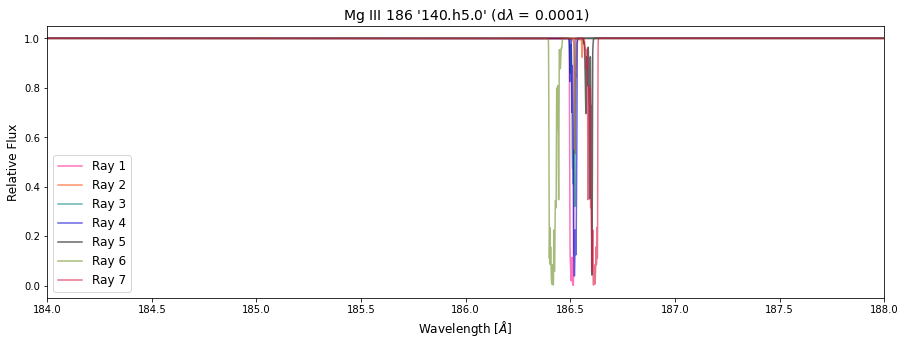

In [41]:
spec(rays, 184,188, 
     el='Mg', rom_num='III', lrest=186.5143, gamma=3.03E+10, f_value=4.74E-01, DIY=True, dlam=0.0001)

yt : [INFO     ] 2022-06-27 02:21:51,851 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:51,854 Creating spectrum
Adding line - Mg III 186 [186.514300 A]: : 100%|██████████| 256/256 [00:00<00:00, 2738.94it/s]
yt : [INFO     ] 2022-06-27 02:21:51,980 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:52,036 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:52,039 Creating spectrum
Adding line - Mg III 186 [186.514300 A]: : 100%|██████████| 294/294 [00:00<00:00, 10248.89it/s]
yt : [INFO     ] 2022-06-27 02:21:52,099 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:52,154 Setting instrument to Custom
yt : [INFO     ] 2022-06-27 02:21:52,157 Creating spectrum
Adding line - Mg III 186 [186.514300 A]: : 100%|██████████| 256/256 [00:00<00:00, 8500.85it/s]
yt : [INFO     ] 2022-06-27 02:21:52,217 Writing spectrum to ascii file: spec.txt.
yt : [INFO     ] 2022-06-27 02:21:52,272 Setting instrument to Custom
yt : [IN

[array([[186.25  , 186.2501, 186.2502, ..., 186.7498, 186.7499, 186.75  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[186.25  , 186.2501, 186.2502, ..., 186.7498, 186.7499, 186.75  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[186.25  , 186.2501, 186.2502, ..., 186.7498, 186.7499, 186.75  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[186.25  , 186.2501, 186.2502, ..., 186.7498, 186.7499, 186.75  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[186.25  , 186.2501, 186.2502, ..., 186.7498, 186.7499, 186.75  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[186.25  , 186.2501, 186.2502, ..., 186.7498, 186.7499, 186.75  ],
        [  1.    ,   1.    ,   1.    , ...,   1.    ,   1.    ,   1.    ]]),
 array([[186.25  , 186.2501, 186.2502, ..., 186.7498, 186.7499, 186.75  ],
        [  1.

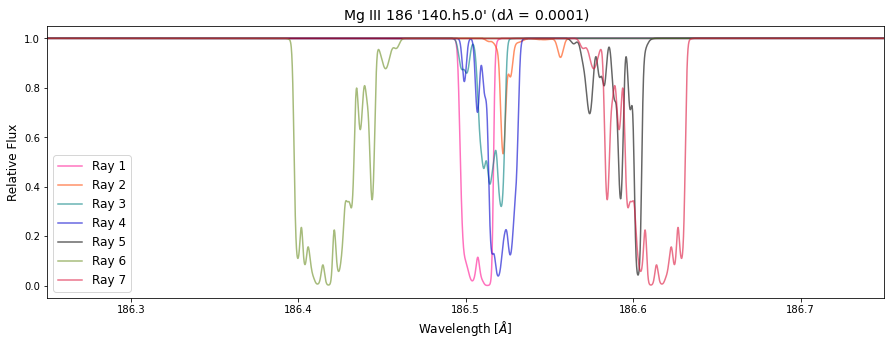

In [42]:
spec(rays, 186.25,186.75,
     el='Mg', rom_num='III', lrest=186.5143, gamma=3.03E+10, f_value=4.74E-01, DIY=True, dlam=0.0001)